

# Project: No-show appointment Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

## In this project we will be analyzing data associated with why do not patients show up for their appointment and factors which may associated with that. 



### Question(s) for Analysis
#### ?Are there factors affect showing up of patient
#### ?Does age affect showing up of patients
#### ?Is there a relation between gender and showing up
#### ?Does Neighbourhood contribute in showing up of patient
#### ?Can sending sms increase showing up of patient
#### ?Does disease type contribute
#### ?what is distribution of age of alcoholic patients

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [112]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
# Data Wrangling



In [113]:
# Load  data and print out a few lines. Perform operations to i
df = pd.read_csv("project.csv")
df.head()
df.shape

(110527, 14)

### No dublicated or null data

In [114]:
#check for duplicates and null value
df.isnull().sum()
sum(df.duplicated())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [115]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



# Data Cleaning


### cleaning columns:
### drop columns we will not need
### rename columns to be easy to handle

In [116]:
#remove space and lower columns 
df.rename(columns=lambda x:x.strip().lower().replace("-","_"), inplace=True)

In [117]:
#drop unused columns
if "handcap" in df.columns:
    df.drop(['appointmentid', 'patientid', 'handcap','appointmentday', 'scheduledday'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
gender           110527 non-null object
age              110527 non-null int64
neighbourhood    110527 non-null object
scholarship      110527 non-null int64
hipertension     110527 non-null int64
diabetes         110527 non-null int64
alcoholism       110527 non-null int64
sms_received     110527 non-null int64
no_show          110527 non-null object
dtypes: int64(6), object(3)
memory usage: 7.6+ MB


In [118]:
#convert no_show column from string to int data type
#show_up = 1, no_show = 0
df['no_show'] = df['no_show'].map({"Yes":0, "No":1})

In [119]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### seem age contain minus value which is not logig I will drop rows contain minus value.

In [120]:
#see number of values that are mins
c=df.query('age < 0').age.count()
#only one so I can get index of row 
#drop row which contain minus
if c > 0:
    i=df.query('age < 0').age.index
    df.drop(df.index[i], inplace=True)


In [121]:
df.shape

(110526, 9)

In [122]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### cleaning step
#### 1-drop null, dublicates, mins values and cloumns not used.
#### 2-remove space and lower column names to be easy handel.
#### 3- convert all to "_".

# Exploratory Data Analysis

In [123]:
#explore data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
gender           110526 non-null object
age              110526 non-null int64
neighbourhood    110526 non-null object
scholarship      110526 non-null int64
hipertension     110526 non-null int64
diabetes         110526 non-null int64
alcoholism       110526 non-null int64
sms_received     110526 non-null int64
no_show          110526 non-null int64
dtypes: int64(7), object(2)
memory usage: 8.4+ MB


,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



### seem: age distribution is between 18 and 55 years old, there are very old patient and babies.
### most patients tend to show up their appointment.
### most popular chronic disease in data is hypertension.
### less popular between patient ist alcoholism.
### most patients did not receive sms.
### most patients did not have scholarship.


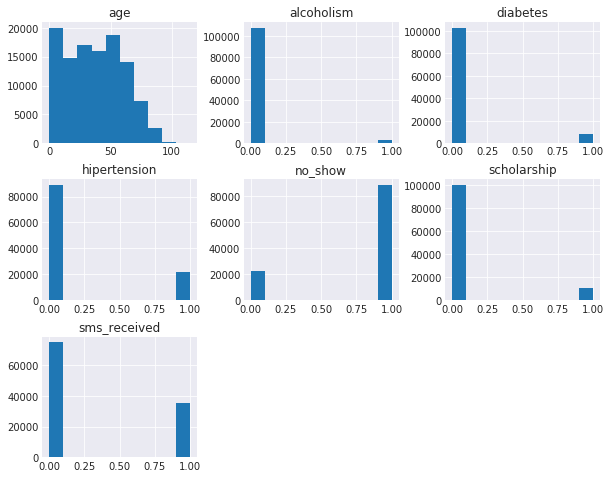

In [124]:
#general exploring data by visualization
df.hist(figsize=(10,8));

#### some functions 

In [125]:
#function to calculate proportional of patient suffering of chronic disese who show up
def prop_patient(column):
    #get N of total patient who have some disease
    total = df[column==1].alcoholism.count()
    #get N of them who attend
    who_attend= df[(column==1) & (df['no_show']==1)].alcoholism.count()
    #get proportional
    prop=who_attend/total
    return prop

In [126]:
# function for plotting
def plot_bar(x, h, ticks=None, c="r", w=0.3,t="", xl="", yl=""):
    plt.bar(x=x, height=h, tick_label=ticks, color=c, width=w)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(t)
    plt.show()

## Questions

## ?Does age affect showing up of patients


In [127]:
#get the median of age

m = df.age.median()
m

37.0

In [128]:
#function to calculate proportional of showing up patients acc to factors
def prop(df):
    total=df.age.count()
    attend=df[df['no_show']==1].age.count()
    return attend/total

#function to calculate proportional of not showing up patients acc to factors
def propn(df):
    total=df.age.count()
    attend=df[df['no_show']==0].age.count()
    return attend/total


In [130]:
df.age.median()

37.0

In [131]:
# proportional of younger patients
show_les_37 = prop(df.query('age<37'))

In [132]:
#proportional of older patients
show_mor_37 = prop(df.query('age>37'))

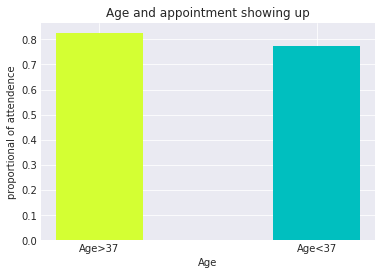

In [133]:
plot_bar([1, 2],[show_mor_37,show_les_37],["Age>37", "Age<37"], ["#D4FF33", "c"], 0.4,
         "Age and appointment showing up", "Age", "proportional of attendence");


### older patients tend to not miss their appointments than jounger

## ?Does Neighbourhood contribute in showing up of patient

In [134]:
#mean of attendence for each Neighbourhood
df.groupby("neighbourhood").no_show.mean().mean()

0.79457212554643353

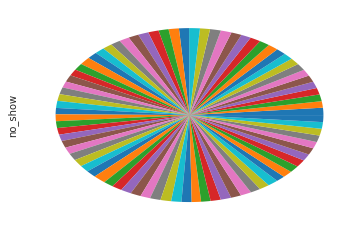

In [135]:
#pie chart for more clarification
df.groupby("neighbourhood").no_show.mean().plot(kind="pie", labels=None);

### mean of attendences is nearly equal, so neighbourhood does not  mostlely contribute .

## ?Can sending sms increase showing up of patient

In [136]:
#prop of showing up received and not received
prop_show_sms = prop(df.query('sms_received == 1'))
prop_show_No_sms = prop(df.query('sms_received == 0'))

In [137]:
#prop of not showing up received and not received
prop_No_show_sms = prop(df.query('sms_received == 1'))
prop_No_show_No_sms = prop(df.query('sms_received == 0'))


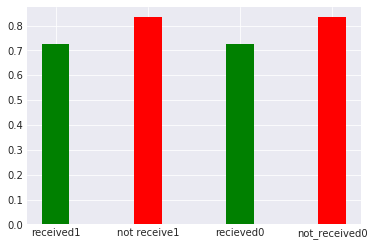

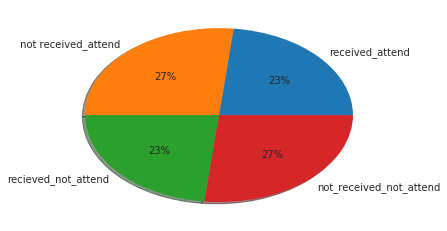

In [138]:
plot_bar([1, 2, 3, 4], [prop_show_sms, prop_show_No_sms, prop_No_show_sms, prop_No_show_No_sms],
         ["received1", "not receive1", "recieved0", "not_received0"], ["g", "r"]);
#1=show up 0 = no show
plt.pie([prop_show_sms, prop_show_No_sms,prop_No_show_sms, prop_No_show_No_sms], shadow=True, 
        labels=["received_attend", " not received_attend", "recieved_not_attend", "not_received_not_attend"], 
        autopct='%.0f%%');

In [139]:
print(prop_show_sms, prop_show_No_sms,prop_No_show_sms, prop_No_show_No_sms)

0.724254551604 0.832964660732 0.724254551604 0.832964660732


### percentage sms received patients who attend or not is equal 
### sending sms dose not influence appointment showing up

## ?Does disease type contribute

In [140]:
prop_patient(df["alcoholism"])

0.79851190476190481

In [141]:
#proportional of alcoholic patients who attend
prop_alc=prop_patient(df["alcoholism"])

In [142]:
#proportional of hypertensive patients who attend
prop_hyper= prop_patient(df["hipertension"])

In [143]:
#proportional of diabetic patients who attend
prop_diab= prop_patient(df["diabetes"])
prop_diab

0.81996726677577736

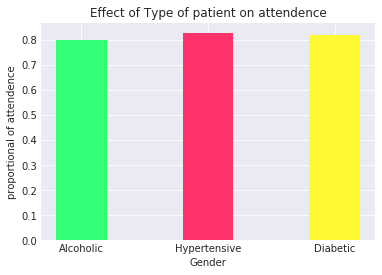

In [144]:
#visualization of results
plot_bar([1, 2, 3], [prop_alc, prop_hyper, prop_diab], ["Alcoholic", "Hypertensive", "Diabetic"],
        ["#33FF77", "#FF336B", "#FFF933"], 0.4, 
         "Effect of Type of patient on attendence","Gender", "proportional of attendence");

### It seem hypertensive patients tend to attend and alcoholic patients tend to not show up their appointment

## ?what is distribution of age of alcoholic patients

In [147]:
#distribution of alcoholism
df.groupby('alcoholism')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
alcoholism,,,,,,,,
0,107166.0,36.697161,23.252967,0.0,17.0,36.0,55.0,115.0
1,3360.0,49.593750,12.707679,4.0,41.0,50.0,59.0,85.0


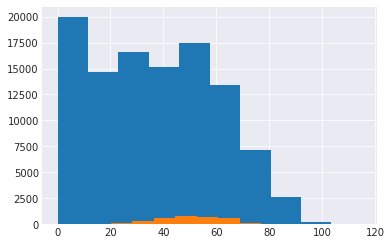

In [148]:
df.groupby('alcoholism')['age'].hist();

### Alcoholic patient ist most between 41 and 59 years old.



## ?Is there a relation between gender and showing up


In [149]:
#calculate the proportional of female and male who are showing up
prop_M_attend = prop(df.query('gender=="M"'))
prop_F_attend = prop(df.query('gender=="F"'))

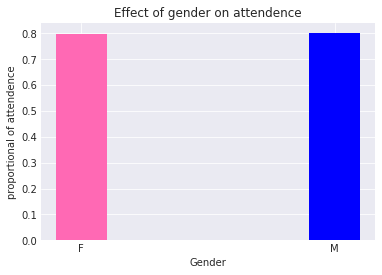

In [150]:
#ploting of result
plot_bar([1, 2], [prop_F_attend, prop_M_attend],["F", "M"], ["hotpink", "b"], 0.2, "Effect of gender on attendence",
      "Gender", "proportional of attendence");

### Male tend to show up appointment more than female but by a small amount so gender do not affect that far.

<a id='conclusions'></a>
## Conclusions

### THere are some factors which influnce appointments show up and factors affect a llitle and other have not any influence,
### 1-Older patients tend to not miss their appointments than jounger.
### 2-Hypertensive patients tend to attend and alcoholic patients tend to not show up their appointment.
### 3-Neighbourhood does not mostlely contribute.
### 4-Sending sms dose not influence appointment showing up.
### Alcoholic patients are mostly between 41 and 59 years old.

## limitations
##### I think data on sms not enough to prove my findings cause the part of patients who recieve sms are small, may if was bigger that will change findings.



In [151]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0